In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
tayko = pd.read_csv("Tayko.csv")
tayko.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,869,869,0,0,0,0,0


In [5]:
tayko.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [7]:
tayko

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,869,869,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1701,1701,1,0,0,1,30
1996,1997,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2633,2633,1,1,0,1,10
1997,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3394,3394,0,0,0,0,0
1998,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,253,253,0,1,1,0,0


In [10]:
tayko = tayko.rename(columns={'Web order':'Web_order'})
tayko.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web_order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [14]:
tayko_cpy = tayko[['Freq','last_update_days_ago', 'Web_order', 'Gender=male', 'Address_is_res', 'US', 'Spending']]
tayko_cpy

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
1995,1,1701,1,0,0,1,30
1996,1,2633,1,1,0,1,10
1997,0,3394,0,0,0,1,0
1998,1,253,0,1,1,1,0


In [19]:
G1 = tayko_cpy['Spending'].groupby(tayko_cpy['Freq'])
print(G1.mean(), G1.std())

Freq
0        0.000000
1       66.322476
2      123.479714
3      234.993243
4      306.061224
5      459.862069
6      556.750000
7      642.125000
8      933.500000
9      870.500000
10    1199.000000
11    1334.000000
12    1320.500000
13    1443.000000
15    1133.000000
Name: Spending, dtype: float64 Freq
0       0.000000
1     104.424412
2     151.509696
3     226.259754
4     165.153642
5     270.661719
6     344.195009
7     520.126478
8     324.925120
9     433.828307
10     21.213203
11    151.320851
12    177.483802
13           NaN
15           NaN
Name: Spending, dtype: float64


In [20]:
G2 = tayko_cpy['Spending'].groupby(tayko_cpy['last_update_days_ago'])
print(G2.mean(), G2.std())

last_update_days_ago
1       109.000000
7       129.000000
9       196.000000
14      303.000000
15       71.000000
           ...    
4065     64.750000
4096     75.666667
4127     17.500000
4157     75.666667
4188     88.000000
Name: Spending, Length: 940, dtype: float64 last_update_days_ago
1              NaN
7              NaN
9              NaN
14             NaN
15      100.409163
           ...    
4065     58.987993
4096     93.681731
4127     24.748737
4157     95.516840
4188     76.374079
Name: Spending, Length: 940, dtype: float64


In [21]:
G3 = tayko_cpy['Spending'].groupby(tayko_cpy['Web_order'])
print(G3.mean(), G3.std())

Web_order
0     82.902439
1    129.199531
Name: Spending, dtype: float64 Web_order
0    173.417088
1    200.463840
Name: Spending, dtype: float64


In [22]:
G4 = tayko_cpy['Spending'].groupby(tayko_cpy['Gender=male'])
print(G4.mean(), G4.std())

Gender=male
0    107.339642
1     98.350810
Name: Spending, dtype: float64 Gender=male
0    190.83233
1    183.02006
Name: Spending, dtype: float64


In [23]:
G5 = tayko_cpy['Spending'].groupby(tayko_cpy['Address_is_res'])
print(G5.mean(), G5.std())

Address_is_res
0    105.306162
1     93.174208
Name: Spending, dtype: float64 Address_is_res
0    199.521159
1    132.204281
Name: Spending, dtype: float64


In [24]:
G6 = tayko_cpy['Spending'].groupby(tayko_cpy['US'])
print(G6.mean(), G6.std())

US
0    101.216524
1    102.924803
Name: Spending, dtype: float64 US
0    174.844401
1    189.275664
Name: Spending, dtype: float64


Text(0, 0.5, 'Spending')

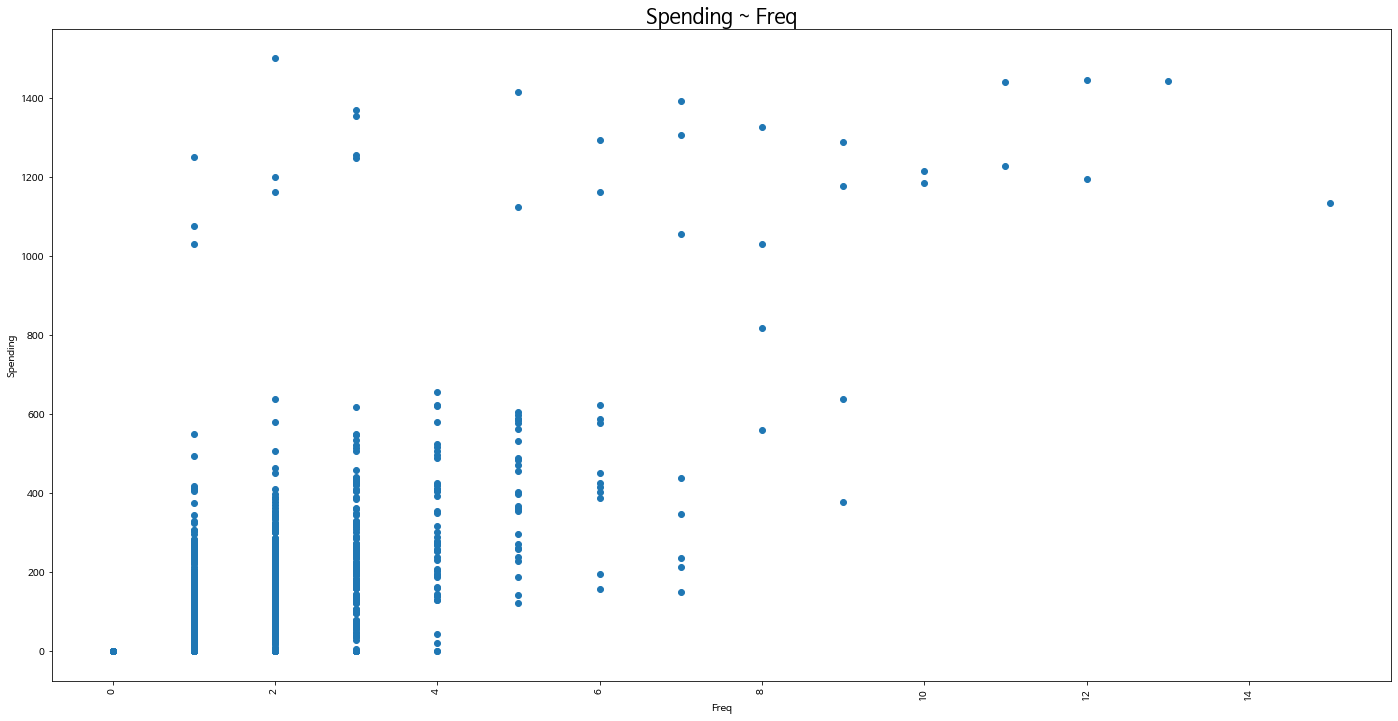

In [15]:
# 2
plt.figure(figsize=(24,12))
plt.scatter(tayko_cpy.Freq, tayko_cpy.Spending)
plt.xticks(rotation=90)
plt.title("Spending ~ Freq", fontsize = 20)
plt.xlabel("Freq")
plt.ylabel("Spending")

Text(0, 0.5, 'Spending')

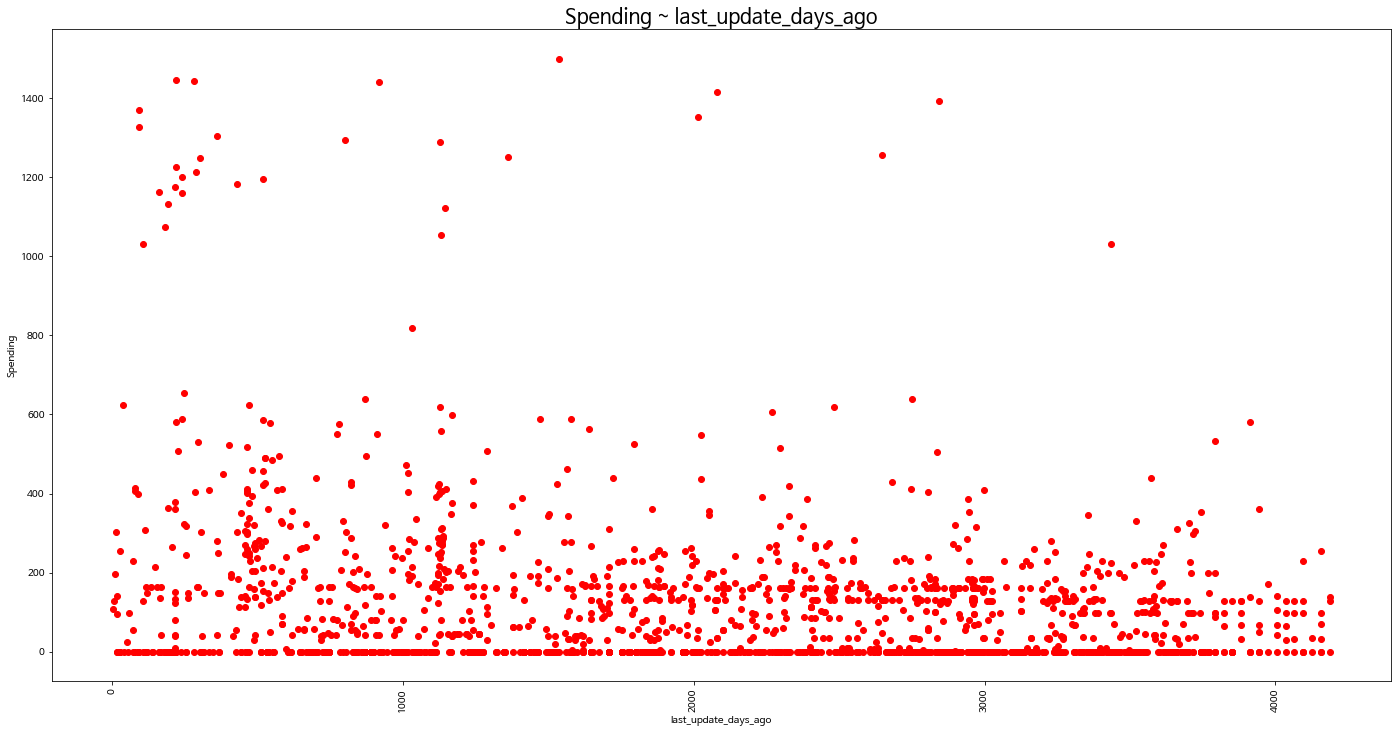

In [16]:
# 2
plt.figure(figsize=(24,12))
plt.scatter(tayko_cpy.last_update_days_ago, tayko_cpy.Spending, color="red")
plt.xticks(rotation=90)
plt.title("Spending ~ last_update_days_ago", fontsize = 20)
plt.xlabel("last_update_days_ago")
plt.ylabel("Spending")

In [28]:
tayko_cpy.count()

Freq                    2000
last_update_days_ago    2000
Web_order               2000
Gender=male             2000
Address_is_res          2000
US                      2000
Spending                2000
dtype: int64

In [26]:
pip install dmba

     |████████████████████████████████| 11.8MB 27.1MB/s 


In [27]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


In [38]:
# 3-1 & 3-2
tayko_df = tayko_cpy

predictors = ['Freq','last_update_days_ago', 'Web_order', 'Gender=male', 'Address_is_res', 'US']
outcome = 'Spending'

# partition data
X = pd.get_dummies(tayko_df[predictors], drop_first=True)
y = tayko_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=1)

tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

# print performance measures
regressionSummary(train_y, tayko_lm.predict(train_X))

intercept  8.176914031275146
              Predictor  coefficient
0                  Freq    93.290492
1  last_update_days_ago    -0.009476
2             Web_order    18.676381
3           Gender=male    -9.155084
4        Address_is_res   -84.167089
5                    US    -5.075059

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 131.5297
     Mean Absolute Error (MAE) : 81.1586


3-3 Freq가 높은 사람(전년도 구매 건수가 높은 사람)

In [68]:
# 3-6
print('score = ',tayko_lm.score(X=pd.DataFrame(X), y=y))

score =  0.5131968723724694


In [39]:
# 3-5
# Use predict() to make predictions on a new set
tayko_lm_pred = tayko_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': tayko_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - tayko_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, tayko_lm_pred)

       Predicted  Actual     Residual
674    83.606293       0   -83.606293
1699  204.246741     184   -20.246741
1282   52.015862       0   -52.015862
1315  841.548925    1289   447.451075
1210    0.652818       0    -0.652818
1636   81.370014       0   -81.370014
613    60.108162       0   -60.108162
447   253.810969    1255  1001.189031
1131   69.177964       0   -69.177964
808    69.898122       0   -69.898122
1496  -13.454052       0    13.454052
1468  197.471572     411   213.528428
1682  -14.286165       0    14.286165
1149  -32.452697       0    32.452697
442    63.890490       0   -63.890490
1813   -1.179257     173   174.179257
654   -44.865943       0    44.865943
1264  -30.635800       0    30.635800
858    82.879571       0   -82.879571
1482   54.413230       0   -54.413230

Regression statistics

               Mean Error (ME) : 4.6154
Root Mean Squared Error (RMSE) : 129.0344
     Mean Absolute Error (MAE) : 81.5362


In [62]:
# 3-6
pred_y = tayko_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, tayko_lm))
print('AIC : ', AIC_score(train_y, pred_y, tayko_lm))
print('BIC : ', BIC_score(train_y, pred_y, tayko_lm))

adjusted r2 :  0.5251020532443031
AIC :  12612.342621396438
BIC :  12651.604663628295


1.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


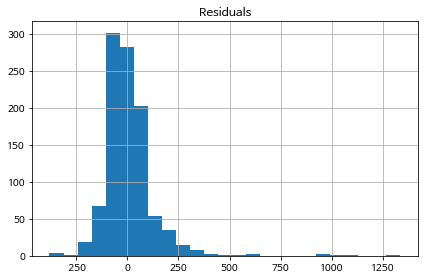

In [40]:
# 3-7
tayko_lm_pred = tayko_lm.predict(valid_X)
all_residuals = valid_y - tayko_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [48]:
# 3-4
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Freq, last_update_days_ago, Web_order, Gender=male, Address_is_res, US
Start: score=12612.34
Step: score=12610.54, remove US
Step: score=12609.82, remove Gender=male
Step: score=12609.82, remove None
['Freq', 'last_update_days_ago', 'Web_order', 'Address_is_res']


In [49]:
tayko_lm_pred

array([ 8.36062933e+01,  2.04246741e+02,  5.20158623e+01,  8.41548925e+02,
        6.52818034e-01,  8.13700138e+01,  6.01081616e+01,  2.53810969e+02,
        6.91779639e+01,  6.98981217e+01, -1.34540519e+01,  1.97471572e+02,
       -1.42861649e+01, -3.24526971e+01,  6.38904897e+01, -1.17925730e+00,
       -4.48659431e+01, -3.06358001e+01,  8.28795710e+01,  5.44132297e+01,
        8.66793509e+01,  1.81472664e+01,  7.69915174e+01,  1.71845510e+02,
       -1.30922191e+01, -3.83247018e+00,  1.86999358e+02,  7.93625642e+01,
        1.04001041e+02,  1.04899738e+02,  1.45675909e+02,  1.94380721e+02,
       -1.96132961e+01,  9.76792089e+01,  3.92861760e+02, -3.01296361e+01,
        1.08595031e+02,  3.67800216e+02,  6.94130159e+01, -9.70937266e+00,
        1.82801684e+02,  3.65565691e+02,  2.98812512e+02,  1.99835064e+02,
        9.24486773e+01,  1.00688552e+02,  9.18305581e+01,  7.63018937e+01,
        6.34625808e+01,  7.37366926e+00,  9.64204325e+01,  1.06644778e+02,
        6.84276250e+01,  

In [51]:
valid_y

674        0
1699     184
1282       0
1315    1289
1210       0
        ... 
103        0
9        174
1929     160
543        0
1542     371
Name: Spending, Length: 1000, dtype: int64

In [52]:
type(valid_y)

pandas.core.series.Series

In [53]:
type(tayko_lm_pred)

numpy.ndarray

In [55]:
import numpy as np
test_y = np.array(valid_y)
test_y

array([   0,  184,    0, 1289,    0,    0,    0, 1255,    0,    0,    0,
        411,    0,    0,    0,  173,    0,    0,    0,    0,  184,    0,
          0,  263,    0,  110,  508,  161,   40,  129,    0,  227,  247,
          0,  123,    0,  130,  362,  128,    0,  108,  280,  241,  377,
        193,  263,  197,  134,    0,    0,    0,    0,  581,  243,    0,
         79,    0,    0,  130, 1446,  170,   69,    0,  517,    0,   54,
          0,    0,   43,    0,    0, 1123,    0,   44,    0,  128,  153,
       1305,    0,  103,    0,   98,    0,    0,    0,   35,    0,   41,
          0,   35, 1500,    0,  164,  101,   10,  369,  171,   40,    0,
          0,  418,  305,  129,    0,    0,  142,   83,  130,    0,  255,
        240,    0,    0,  145,  308,    0,  484,   22,    0,  321,    0,
          0,   55,  183,   15,    0,    0,    0,    0,    0,  229,  129,
         19,  114,  129,  450,    0,   96,    0,   43,  160, 1249,    0,
        236,    0,    0,    0,    0,    0,  399,  1

In [60]:
print(type(test_y), type(tayko_lm_pred))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [61]:
# 3-6
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(train_X, train_y) #모델의 정확도 확인

print('학습용 데이터셋 정확도 : %.2f' % log.score(train_X, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(valid_X, valid_y))

학습용 데이터셋 정확도 : 0.51
검증용 데이터셋 정확도 : 0.49


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
